#Assignment I-7: Data-Driven Insights for EdTech Study Habit App Development"

Stephanie Sorto-Moreno

#1) Project Introduction

Exploring Factors Influencing Student Performance for an EdTech Study Habit App

##1.1 Overview
This project explores the various factors that affect student performance, focusing on key aspects such as study habits, resource access, parental involvement, and motivation. The goal is to extract actionable insights that can inform the development of an EdTech study habit app aimed at improving student outcomes by providing personalized recommendations.

Objective:
The primary objective of this analysis is to identify patterns and correlations between student behaviors and academic performance (final exam scores). By understanding these patterns, the app can suggest personalized study schedules, motivational prompts, and resources that support better academic outcomes. We also aim to uncover key factors like the role of parental involvement, the impact of sleep, and how access to educational resources influences success.

Expected Outcomes:
Identifying Key Study Habits: Understand which behaviors (e.g., hours studied, tutoring sessions, motivation) have the strongest impact on exam performance.
Parental Involvement and Support: Determine how parental involvement and education level affect student success and how these insights can shape app features.
Impact of External Factors: Explore how factors like sleep, physical activity, and access to resources (internet, tutoring) contribute to academic performance.
Personalized Study Plan Features: Develop insights to build predictive models that show users how their current habits affect future exam outcomes, enabling personalized study plan recommendations.
Feature Prioritization: Help prioritize which features (such as motivational alerts, sleep tracking, or peer influence mechanisms) are most crucial for the app’s development.

Dataset Overview:
This dataset contains a comprehensive set of factors that influence student performance, categorized into behaviors, resource availability, and external influences. Below is a key to the dataset columns:

Attribute	Description
* Hours_Studied: Number of hours spent studying per week
Attendance	Percentage of classes attended
* Parental_Involvement:	Level of parental involvement in the student's education (Low, Medium, High)
* Access_to_Resources:	Availability of educational resources (Low, Medium, High)
* Extracurricular_Activities: Participation in extracurricular activities (Yes, No)
* Sleep_Hours: Average number of hours of sleep per night
* Previous_Scores: Scores from previous exams
* Motivation_Level:	Student's level of motivation (Low, Medium, High)
* Internet_Access: Availability of internet access (Yes, No)
* Tutoring_Sessions:	Number of tutoring sessions attended per month
* Family_Income	Family income level: (Low, Medium, High)
* Teacher_Quality:	Quality of the teachers (Low, Medium, High)
* School_Type:	Type of school attended (Public, Private)
* Peer_Influence:	Influence of peers on academic performance (Positive, Neutral, Negative)
* Physical_Activity:	Average number of hours of physical activity per week
* Learning_Disabilities:	Presence of learning disabilities (Yes, No)
* Parental_Education_Level:	Highest education level of parents (High School, College, Postgraduate)
* Distance_from_Home:	Distance from home to school (Near, Moderate, Far)
* Gender:	Gender of the student (Male, Female)
* Exam_Score:	Final exam score

Dataset is from Kaggle:
https://www.kaggle.com/datasets/lainguyn123/student-performance-factors

Google Colab Folder for .csv file
https://drive.google.com/drive/folders/1ExTVQ4WLGvrt_Ye0dQxJZhkUYeT4l4q7?usp=sharing

In [1]:
# Mounting Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
############
# Packages #
############
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import math
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from scipy import stats
from IPython.display import display, Latex

#2) Cleaning, Organizing, & Exploring Data Set

##2.1) Clean and organize data

In [3]:
df = pd.read_csv('/content/drive/MyDrive//DTI//Tech Core 1 - 530//Student Performance Factors//StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
# Total number of entries in the DataFrame
total_entries = len(df)
print(f"Total number of entries: {total_entries}")

Total number of entries: 6607


In [5]:
#check for null values
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [6]:
#Fill null values in Parental Education Level with mode
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)

In [7]:
# Create a mapping for the ordinal categories
distance_mapping = {
    'Near': 1,
    'Moderate': 2,
    'Far': 3
}

# Apply mapping to the Distance_from_Home column
df['Distance_from_Home'] = df['Distance_from_Home'].map(distance_mapping)

In [8]:
#Fill null values in Distance from Home with median
df['Distance_from_Home'].fillna(df['Distance_from_Home'].median(), inplace=True)

In [9]:
#check encoding was done properly
df[['Distance_from_Home']].head()

,Distance_from_Home
0,1.0
1,2.0
2,1.0
3,2.0
4,1.0


In [10]:
#Fill null values in Teacher Quality with mode
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)

In [11]:
categorical_columns = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                       'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
                       'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level',
                       'Gender']

# Convert each of these columns to 'category' data type
df[categorical_columns] = df[categorical_columns].astype('category')

In [12]:
# Check the data types of the columns
df.dtypes

,0
Hours_Studied,int64
Attendance,int64
Parental_Involvement,category
Access_to_Resources,category
Extracurricular_Activities,category
Sleep_Hours,int64
Previous_Scores,int64
Motivation_Level,category
Internet_Access,category
Tutoring_Sessions,int64


In [13]:
#check for null values
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


##2.2 Exploratory Data Analysis


In [14]:
#Find mean, median, mode and standard deviation for quantitative continuous data, display as table
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Distance_from_Home,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,1.501589,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,0.670260,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,1.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,1.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,1.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,2.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,3.000000,101.000000


##Key Highlights from Dataset:

**Study Hours:**

Mean: 19.98 hours/week with a maximum of 44 hours.
There's significant variability in study habits with a standard deviation of 5.99.

**Attendance:**

Mean: 80% attendance rate, indicating generally consistent class attendance.
Standard deviation of 11.55% shows some variation, but most students are attending regularly.

**Sleep Hours:**

Mean: 7.03 hours/night, slightly below recommended levels.
Range: 4 to 10 hours, with notable variance (std: 1.47), suggesting different sleep patterns.

**Previous Scores:**

Mean: 75.07, indicating above-average past performance.
Standard deviation of 14.4 suggests wide variability in previous exam results.

**Physical Activity:**

Mean: 2.97 hours/week with some students reporting 0 hours, suggesting possible sedentary lifestyles for part of the cohort.

**Distance from Home:**

Mean: 1.50 units (potentially scaled or categorical), with limited spread, suggesting most students live relatively close to school.
Exam Scores:

Mean: 67.23, showing slightly below average performance.
Standard deviation of 3.89 indicates scores are fairly clustered around the mean, though extremes exist (min: 55, max: 101).

**Potential Exploration Areas:**
* Investigate the correlation between sleep hours and exam performance.
Analyze how study hours impact exam scores, especially for those studying significantly more or less than average.

* Explore the impact of previous scores on current exam performance to identify predictive value.

* Examine the role of physical activity on student performance, especially with time management or stress relief in mind.

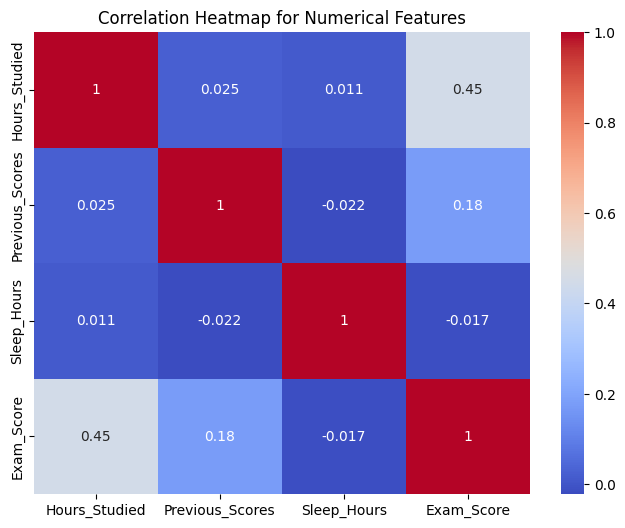

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for numerical columns
correlation_matrix = df[['Hours_Studied', 'Previous_Scores', 'Sleep_Hours', 'Exam_Score']].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

Correlation Heatmap shows:

**Hours Studied** has the strongest positive correlation with Exam Scores (0.45), indicating that students who study more tend to perform better on exams.

**Previous Scores** also show a moderate positive correlation with Exam Scores (0.18), suggesting that past performance is a weaker but still relevant predictor of future success.

**Sleep Hours** has no significant correlation with exam performance, suggesting that sleep may not directly affect exam outcomes in this dataset.

**These insights suggest that study hours and past performance are key focus areas for improving academic results**

Sleep may not be as impactful for predicting performance in this context.

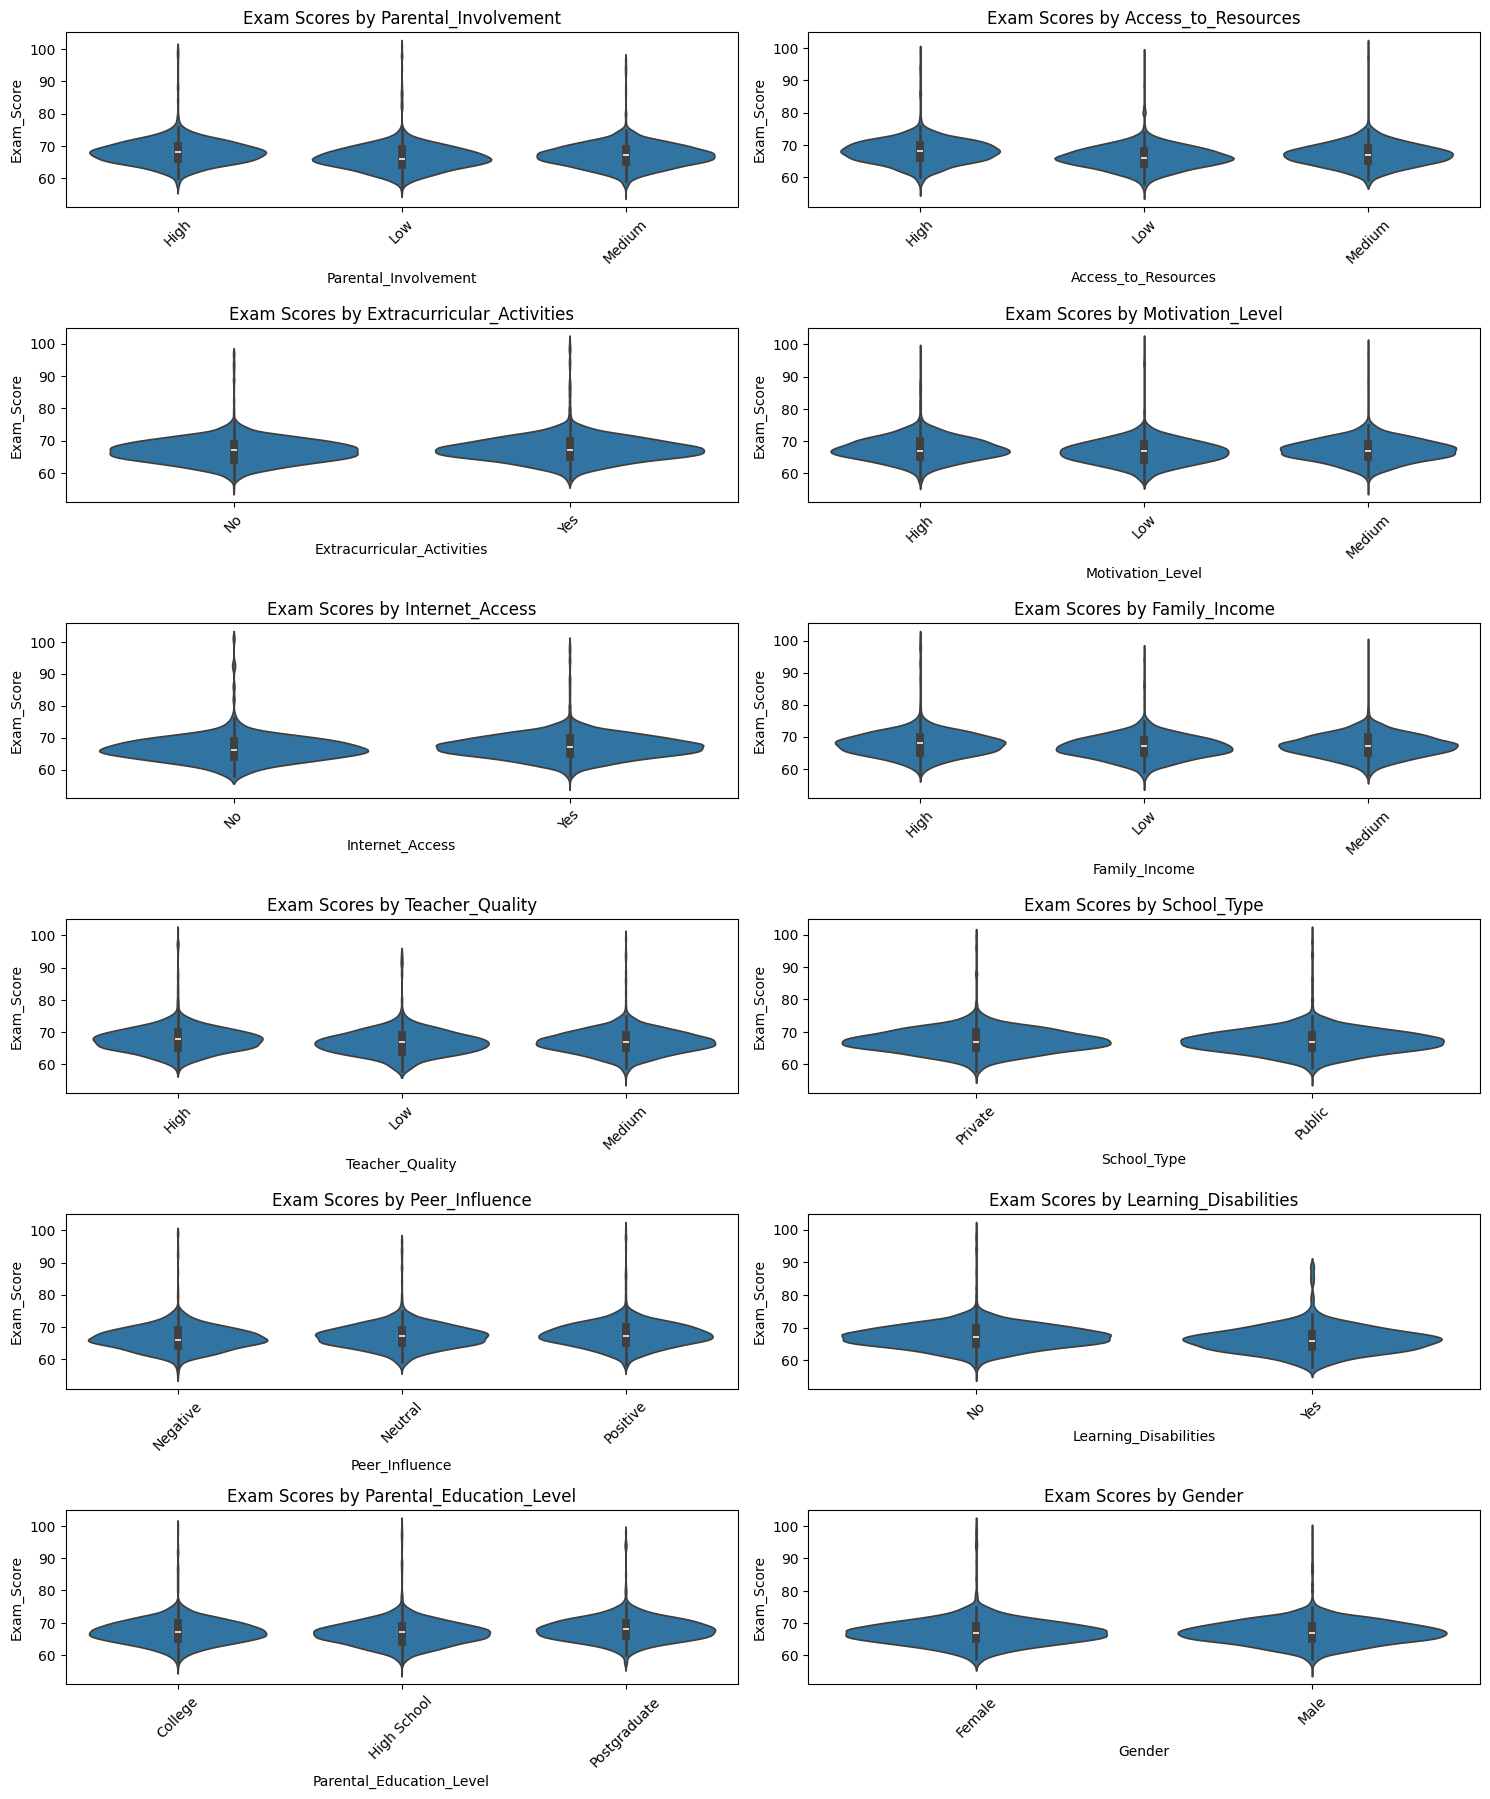

In [16]:
# Set up the figure size for the plots
plt.figure(figsize=(15, 20))

# Loop through the categorical columns and plot violin plots for each
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns)//2 + 1, 2, i)
    sns.violinplot(x=col, y='Exam_Score', data=df)
    plt.title(f'Exam Scores by {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

The violin plots visually represent the distribution of Exam Scores across different categorical variables. Each plot shows the density of exam scores for each category, indicating where most of the data is concentrated and how spread out the values are.

Key takeaways:

Parental Involvement: There is a slight difference between the categories, with the high involvement group showing a slightly higher median and less spread.

Access to Resources: High access to resources seems to result in slightly better exam scores, with tighter distribution, compared to low or medium access.

Motivation Level: There is a noticeable difference between high motivation and the other levels, with high motivation showing higher exam scores.

Teacher Quality: High teacher quality seems to correlate with better exam scores compared to low teacher quality, though the distributions overlap.

Extracurricular Activities and Internet Access: These seem to show smaller differences across categories but may still provide useful insights for exploration.

**Top Categorical Variables for Further Inference**:

Motivation Level: Since this shows a distinct difference in score distributions, it's a strong candidate for further analysis, potentially using a test like the Kruskal-Wallis or Mann-Whitney U test.

Access to Resources: The relationship between resource access and exam performance could also be explored more deeply with inference testing.

Teacher Quality: Given the noticeable difference between high and low teacher quality, testing for significance here could yield actionable insights.


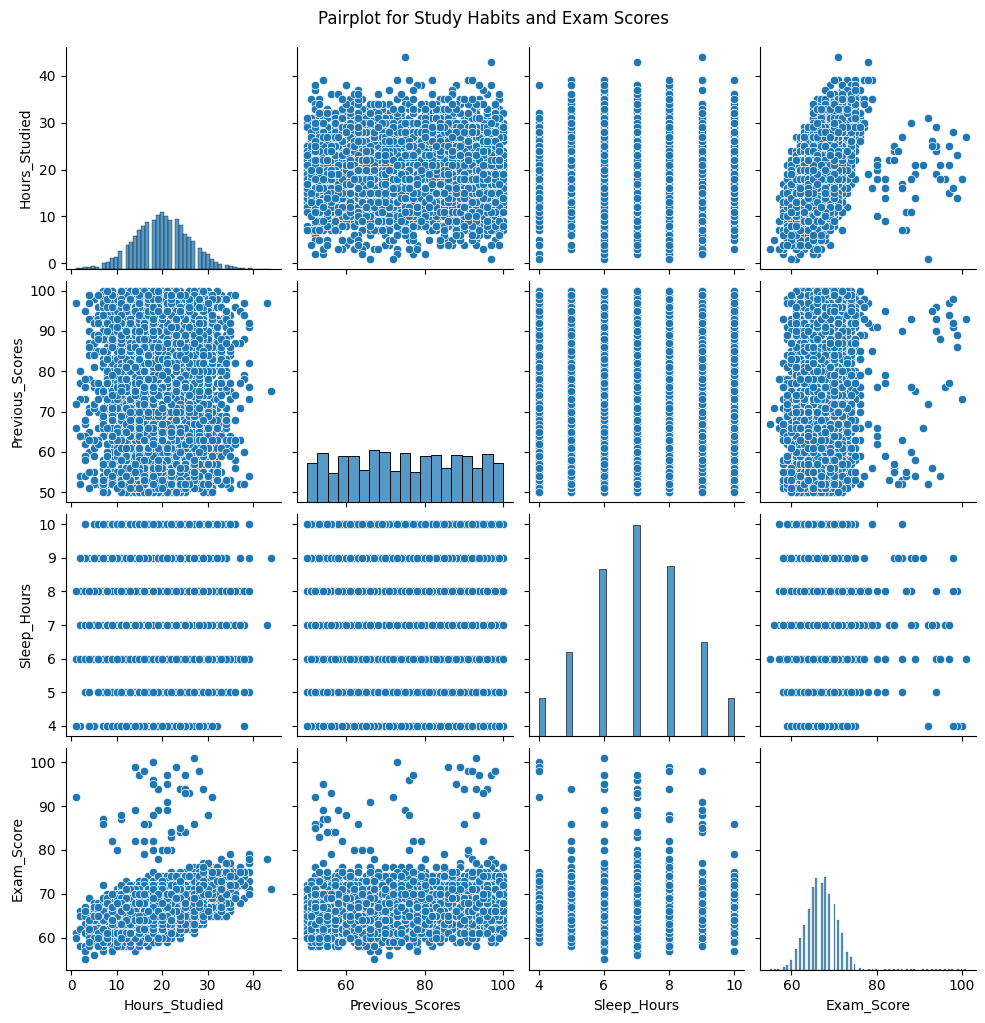

In [17]:
# Pairplot for Hours Studied, Previous Scores, Sleep Hours, and Exam Score
sns.pairplot(df[['Hours_Studied', 'Previous_Scores', 'Sleep_Hours', 'Exam_Score']])
plt.suptitle('Pairplot for Study Habits and Exam Scores', y=1.02)
plt.show()

The pairplot reveals several important insights that can guide the development of the study habit app:

Hours Studied has a positive correlation with Exam Scores: Students who study more tend to perform better, though there is variability in the results. The app can emphasize tracking and optimizing study hours for each student.

Previous Scores are moderately predictive of Exam Scores: Students with higher previous scores generally perform better, but additional factors, such as study habits or access to resources, likely contribute to variations. The app can incorporate predictive models to personalize recommendations based on past performance.

Sleep Hours shows no clear correlation with Exam Scores: Most students sleep between 6-8 hours, with little impact on performance. While sleep tracking could be a feature, further exploration is needed to see if combining it with other habits influences results.

**These insights suggest the app should focus on tracking study hours and leveraging past performance to provide personalized study recommendations**, while additional research on the role of motivation and external factors may reveal further opportunities for feature development.

##3) Inference

For test exploration, we need to look at Shapiro-Wilk Test result for dependent variable **Exam Score**

In [18]:
from scipy.stats import shapiro

# Check normality for exam scores
stat, p_value = shapiro(df['Exam_Score'])
print(f'Statistic={stat}, P-value={p_value}')

if p_value > 0.05:
    print("Data is normally distributed")
else:
    print("Data is not normally distributed")

Statistic=0.9029140953482367, P-value=8.4304278588705e-54
Data is not normally distributed


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6607.
  res = hypotest_fun_out(*samples, **kwds)



The Shapiro-Wilk test results show a p-value of 8.43e-54, which is much smaller than the typical significance threshold of 0.05. This means the data is not normally distributed. Since the assumption of normality is violated, you should use non-parametric tests such as the Kruskal-Wallis test or Mann-Whitney U test instead of parametric tests like ANOVA or t-tests for further analysis.

##Inference Test 1:  Chi-Squared Tests to Explore the Relationships between Teacher Quality/Access to Resources and Student Motivation Levels

In this analysis, we conducted two Chi-Squared tests to explore the relationship between key categorical variables and student motivation levels. The two categorical variables—Teacher Quality and Access to Resources—were identified as having the greatest potential for impact based on exploratory data analysis.

These tests help us investigate whether there is a statistically significant association between these external factors and student motivation, providing insights that could inform product feature development or interventions aimed at enhancing student performance.

##2. Chi-Squared Test: Access to Resources vs. Motivation Level
Objective:
To examine whether access to educational resources influences student motivation levels. Understanding this relationship can inform interventions or features aimed at improving motivation by providing more resources.

Null Hypothesis (H0):
There is no association between access to resources and student motivation levels. Access to resources does not impact how motivated students feel.

In [19]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table between 'Access_to_Resources' and 'Motivation_Level'
contingency_table = pd.crosstab(df['Access_to_Resources'], df['Motivation_Level'])

# Perform the Chi-Squared test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Squared Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)

# Interpretation
if p_value < 0.05:
    print("There is a significant association between Access to Resources and Motivation Levels.")
else:
    print("There is no significant association between Access to Resources and Motivation Levels.")


Chi-Squared Statistic: 3.762130016146893
P-value: 0.43915406251035205
Degrees of Freedom: 4
Expected Frequencies Table:
[[ 394.28257908  579.01846526 1001.69895565]
 [ 262.12305131  384.93733919  665.93960951]
 [ 662.59436961  973.04419555 1683.36143484]]
There is no significant association between Access to Resources and Motivation Levels.


We fail to reject the null hypothesis in this case.

The p-value is 0.439, which is greater than the significance level of 0.05. This means there is no statistically significant association between Access to Resources and Motivation Levels based on this test. Therefore, we conclude that access to resources does not have a significant impact on how motivated students feel based on this dataset.

##1. Chi-Squared Test: Teacher Quality vs. Motivation Level
Objective:
To determine if there is a significant relationship between the quality of teachers and the motivation levels of students. This will help understand if teacher performance impacts how motivated students feel.

Null Hypothesis (H0):
There is no association between teacher quality and student motivation levels. In other words, teacher quality does not affect motivation.

In [20]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table for Teacher Quality and Motivation Level
contingency_table = pd.crosstab(df['Teacher_Quality'], df['Motivation_Level'])

# Perform Chi-Squared Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Squared Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant association between Teacher Quality and Motivation Level.")
else:
    print("There is no significant association between Teacher Quality and Motivation Level.")

Chi-Squared Statistic: 13.143691507470852
P-value: 0.010594620663996752
There is a significant association between Teacher Quality and Motivation Level.


For the Chi-Squared Test: Teacher Quality vs. Motivation Level, we reject the null hypothesis.

The Chi-Squared Test reveals a statistically significant association between Teacher Quality and Motivation Level, with a p-value of 0.0105, indicating that higher-quality teaching correlates with increased student motivation. This finding suggests that interventions aimed at improving teacher quality could enhance student motivation, potentially leading to better educational outcomes.

However, it's important to recognize the limitations of this analysis, particularly the risks of Type I and Type II errors. A Type I error could lead us to incorrectly conclude that teacher quality impacts motivation when it does not, potentially prompting unnecessary or misdirected interventions. Conversely, a Type II error could result in failing to recognize a genuine relationship between teacher quality and motivation, thus missing valuable opportunities for improvement.

##Actionable Insights for Product Feature Development: Teacher Quality vs. Motivation Level
* Targeted Teacher Training Programs: Develop training initiatives focused on effective teaching strategies and engagement techniques to enhance teacher quality and, consequently, student motivation.

* Feedback Mechanism: Implement a system for students to provide feedback on teaching effectiveness, helping identify areas for improvement and fostering a culture of continuous growth among educators.

* Resource Allocation for High Performers: Invest in recognizing and supporting high-performing teachers to promote excellence, encouraging others to adopt best practices that can boost student motivation.




#Inference Test 2: Exploring the Impact of Motivation Levels and Study Hours on Exam Performance Using the Kruskal-Wallis Test

* Objective:
The goal of this test is to explore whether there is a significant difference in exam scores based on students' Motivation Levels (Low, Medium, High) and the number of hours they study. Since the data does not follow a normal distribution, we are using the Kruskal-Wallis Test, which allows us to compare the medians of these groups without assuming the data is normally distributed.

* Null Hypothesis (H₀):
There is no significant difference in the exam scores between students based on their Motivation Level and the number of Hours Studied. In other words, the different motivation levels and hours of study do not significantly impact student exam performance.

* Why This Test is Relevant:
This test is crucial because it allows us to determine if students with different motivation levels and study habits perform differently on exams. By understanding these differences, we can tailor the app to provide more personalized study recommendations or motivational tools based on how much students study and their motivation level. Since our data does not meet the assumption of normality, the Kruskal-Wallis Test is the best choice because it does not require normally distributed data and can still give us meaningful insights into how these factors interact.

* Test Type:
This is a non-parametric test called the Kruskal-Wallis Test, which is used to compare the distributions (specifically the medians) of multiple independent groups—in this case, students with different Motivation Levels and different amounts of Hours Studied.



In [21]:
import numpy as np

# Split the exam scores based on motivation levels ('Low', 'Medium', and 'High') to make comparisons between these groups more targeted.
low_motivation_scores = df[df['Motivation_Level'] == 'Low']['Exam_Score']
medium_motivation_scores = df[df['Motivation_Level'] == 'Medium']['Exam_Score']
high_motivation_scores = df[df['Motivation_Level'] == 'High']['Exam_Score']

# Calculate the average exam score and the spread (standard deviation) of the scores within each motivation group. This helps us understand the performance trends for each group.
mean_low = low_motivation_scores.mean()
mean_medium = medium_motivation_scores.mean()
mean_high = high_motivation_scores.mean()

std_low = low_motivation_scores.std()
std_medium = medium_motivation_scores.std()
std_high = high_motivation_scores.std()

# Print means and standard deviations
print(f"Mean of Low Motivation: {mean_low}, Std: {std_low}")
print(f"Mean of Medium Motivation: {mean_medium}, Std: {std_medium}")
print(f"Mean of High Motivation: {mean_high}, Std: {std_high}")

# calculate the pooled standard deviation, which combines the variability of all motivation groups into one value, allowing us to make more accurate comparisons between groups
pooled_std = np.sqrt((std_low**2 + std_medium**2 + std_high**2) / 3)

# Calculate Cohen's d between low and high motivation groups as an example
cohens_d = (mean_high - mean_low) / pooled_std
print(f"Cohen's d: {cohens_d}")

# Calculate the MDE
std_exam_scores = df['Exam_Score'].std()  # Standard deviation of the entire 'Exam_Score' column
MDE = cohens_d * std_exam_scores
print(f"Minimum Detectable Effect (MDE): {MDE} points")

Mean of Low Motivation: 66.75219411461022, Std: 3.958139248359957
Mean of Medium Motivation: 67.33064756789018, Std: 3.8273034229047482
Mean of High Motivation: 67.70432145564821, Std: 3.8769664712893053
Cohen's d: 0.24489856201084015
Minimum Detectable Effect (MDE): 0.9527670263977559 points


In [22]:
#visualize motivation level and exam score by grouping as boxplots
fig = px.box(df, x='Motivation_Level', y='Exam_Score', title='Motivation Level vs. Exam Score')
fig.show()

##Inference:

Students with higher motivation levels tend to achieve higher average exam scores. This trend suggests that motivation could play a significant role in academic performance.

The standard deviation is lower for higher motivation groups, indicating that students in these groups tend to have exam scores that are more clustered around the mean. In contrast, students with low motivation show greater variability in their scores.

Cohen's d value of 0.24 indicates a small effect size, suggesting that the difference in exam scores between low and high motivation groups is not only statistically significant but also practically meaningful, though modest. This could guide interventions targeting motivation enhancement.

The MDE indicates the smallest effect that can be detected with sufficient power in your study. In this case, an increase of approximately 0.953 points in exam scores is the threshold needed to assert that any observed differences are not due to random chance.

In [23]:
import scipy.stats as stats


# To perform the Kruskal-Wallis test for Motivation Levels (Low, Medium, High)
low_motivation_scores = df[df['Motivation_Level'] == 'Low']['Exam_Score']
medium_motivation_scores = df[df['Motivation_Level'] == 'Medium']['Exam_Score']
high_motivation_scores = df[df['Motivation_Level'] == 'High']['Exam_Score']

# Kruskal-Wallis Test for Motivation Levels
stat_motivation, p_value_motivation = stats.kruskal(low_motivation_scores, medium_motivation_scores, high_motivation_scores)

# Print the results for Motivation Level
print(f"Kruskal-Wallis Test for Motivation Level: H-statistic = {stat_motivation:.3f}, p-value = {p_value_motivation:.5f}")
if p_value_motivation < 0.05:
    print("There is a significant difference in exam scores based on Motivation Level.")
else:
    print("There is no significant difference in exam scores based on Motivation Level.")




Kruskal-Wallis Test for Motivation Level: H-statistic = 59.085, p-value = 0.00000
There is a significant difference in exam scores based on Motivation Level.


##Inference:

The H-statistic from the Kruskal-Wallis test is high, and the p-value is extremely low (much less than 0.05), indicating strong evidence against the null hypothesis. This suggests a significant difference in exam scores among the motivation levels. Therefore, we can conclude that motivation level significantly impacts academic performance.

In [24]:
# Split the study hours based on differtent study hour ranges, Grouping based on
# () Low = <= 5, Medium = 6-10, High = > 10 hours)
low_hours_studied = df[df['Hours_Studied'] <= 5]['Exam_Score']
medium_hours_studied = df[(df['Hours_Studied'] > 5) & (df['Hours_Studied'] <= 10)]['Exam_Score']
high_hours_studied = df[df['Hours_Studied'] > 10]['Exam_Score']


# Calculate the average exam score and the spread (standard deviation) of the scores within each study group. This helps us understand the performance trends for each group.

mean_low_hours = low_hours_studied.mean()
mean_medium_hours = medium_hours_studied.mean()
mean_high_hours = high_hours_studied.mean()

std_low_hours = low_hours_studied.std()
std_medium_hours= medium_hours_studied.std()
std_high_hours = high_hours_studied.std()

# Print means and standard deviations
print(f"Mean of Low Hours Studied: {mean_low_hours}, Std: {std_low_hours}")
print(f"Mean of Medium Hours Studied: {mean_medium_hours}, Std: {std_medium_hours}")
print(f"Mean of High Hours Studied: {mean_high_hours}, Std: {std_high_hours}")

# calculate the pooled standard deviation, which combines the variability of all motivation groups into one value, allowing us to make more accurate comparisons between groups
pooled_std_hours = np.sqrt((std_low_hours**2 + std_medium_hours**2 + std_high_hours**2) / 3)

# Calculate Cohen's d between low and high motivation groups as an example
cohens_d_hours = (mean_high_hours - mean_low_hours) / pooled_std_hours
print(f"Cohen's d: {cohens_d_hours}")

# Calculate the MDE
std_exam_scores = df['Exam_Score'].std()  # Standard deviation of the entire 'Exam_Score' column
MDE = cohens_d_hours * std_exam_scores
print(f"Minimum Detectable Effect (MDE): {MDE} points")

Mean of Low Hours Studied: 62.6271186440678, Std: 5.078345865245907
Mean of Medium Hours Studied: 64.22549019607843, Std: 3.6238921094887826
Mean of High Hours Studied: 67.42678628644666, Std: 3.8023395199340957
Cohen's d: 1.1378436841572168
Minimum Detectable Effect (MDE): 4.426730539201583 points


##Inference:

Students with High Hours Studied tend to achieve higher exam scores.

The low study hours group has a higher standard deviation, indicating that scores in this group vary more widely from the mean compared to the other two groups.

A Cohen's d of -0.51 suggests a medium effect size, indicating that the difference in scores between students who study low vs. high is meaningful.

The MDE score informs product features that should be designed to target at least a 4.42-point increase in exam scores through enhanced study habits.

In [25]:
#Kruskal-Wallis Test for Study Hours
stat_hours, p_value_hours = stats.kruskal(low_hours_studied, medium_hours_studied, high_hours_studied)

#Print the results for Study Hours
print(f"Kruskal-Wallis Test for Study Hours: H-statistic = {stat_hours:.3f}, p-value = {p_value_hours:.5f}")
if p_value_hours < 0.05:
    print("There is a significant difference in exam scores based on Hours Studied.")
else:
    print("There is no significant difference in exam scores based on Hours Studied.")


Kruskal-Wallis Test for Study Hours: H-statistic = 324.715, p-value = 0.00000
There is a significant difference in exam scores based on Hours Studied.


##Inference:
The H-statistic reflects the extent of differences in ranks between groups. An H-statistic of 324 for motivation levels indicates a substantial difference in exam scores among the three study categories (Low, Medium, and High)

The low p-value (0.0000) indicates that there is a statistically significant difference in exam scores based on study levels, leading to the rejection of the null hypothesis. This implies that motivation level affects exam performance.

In [26]:
print(f"Low Motivation Group Size: {len(low_motivation_scores)}")
print(f"Medium Motivation Group Size: {len(medium_motivation_scores)}")
print(f"High Motivation Group Size: {len(high_motivation_scores)}")

print(f"Low Study Hours Group Size: {len(low_hours_studied)}")
print(f"Medium Study Hours Group Size: {len(medium_hours_studied)}")
print(f"High Study Hours Group Size: {len(high_hours_studied)}")

Low Motivation Group Size: 1937
Medium Motivation Group Size: 3351
High Motivation Group Size: 1319
Low Study Hours Group Size: 59
Medium Study Hours Group Size: 306
High Study Hours Group Size: 6242


In [27]:
print(f"Unique Exam Scores in Low Motivation Group: {low_motivation_scores.unique()}")
print(f"Unique Exam Scores in Medium Motivation Group: {medium_motivation_scores.unique()}")
print(f"Unique Exam Scores in High Motivation Group: {high_motivation_scores.unique()}")

print(f"Unique Exam Scores in Low Study Hours Group: {low_hours_studied.unique()}")
print(f"Unique Exam Scores in Medium Study Hours Group: {medium_hours_studied.unique()}")
print(f"Unique Exam Scores in High Study Hours Group: {high_hours_studied.unique()}")

Unique Exam Scores in Low Motivation Group: [ 67  61  71  70  60  66  64  65  68  62  69  74  72  79  63  75  73  59
  83  58  94  80  82 101  76  86  99  96  57  78  93  98  95]
Unique Exam Scores in Medium Motivation Group: [ 74  71  70  66  72  68  65  64  63  69  67  61  60 100  76  73  78  62
  75  86  97  59  94  55  89  92  88  80  79  84  91  77  87  82  58  99
  98  95  93  56]
Unique Exam Scores in High Motivation Group: [69 66 64 71 68 67 70 65 62 63 72 74 89 60 73 61 75 84 80 77 58 76 87 57
 59 88 86 78 82 85 94 92 98]
Unique Exam Scores in Low Study Hours Group: [69 61 68 59 58 64 62 55 66 65 60 63 67 92 56 57]
Unique Exam Scores in Medium Study Hours Group: [66 65 67 63 60 64 61 62 70 68 69 82 71 72 80 59 87 57 86 58]
Unique Exam Scores in High Study Hours Group: [ 67  61  74  71  70  66  69  72  68  64  60  65  63  62 100  76  79  73
  78  89  75  59  86  97  83  84  80  94  92  58  77 101  88  91  99  87
  82  96  57  98  95  85  93]


##*Refinement:*

As p value was 0 for the motivation groups (Low, Medium, High), the initial categorization of hours studied was too broad and might not have adequately captured the nuances in how varying amounts of study hours affected performance.

By splitting study hours into quantiles (25%, 50%, 75%), the analysis aimed to improve the statistical significance (p-value) of the results. This allows for a more granular comparison, revealing more precise insights into how different study hour levels influence exam performance.

In [28]:
#Create Study Hours Groups based on quantiles (25%, 50%, 75%)
df['Study_Hours_Group'] = pd.qcut(df['Hours_Studied'], q=4, labels=['Very Low', 'Low', 'Medium', 'High'])

# Now proceed with the Kruskal-Wallis test for these new groups
very_low_hours = df[df['Study_Hours_Group'] == 'Very Low']['Exam_Score']
low_hours = df[df['Study_Hours_Group'] == 'Low']['Exam_Score']
medium_hours = df[df['Study_Hours_Group'] == 'Medium']['Exam_Score']
high_hours = df[df['Study_Hours_Group'] == 'High']['Exam_Score']

# Kruskal-Wallis Test for the new Study Hours Groups
stat_hours, p_value_hours = stats.kruskal(very_low_hours, low_hours, medium_hours, high_hours)
print(f"Kruskal-Wallis Test for Study Hours (Quantiles): H-statistic = {stat_hours:.3f}, p-value = {p_value_hours:.5f}")

Kruskal-Wallis Test for Study Hours (Quantiles): H-statistic = 1412.752, p-value = 0.00000


##Inference:

The 1412 H-statistic for study hours suggests an even more pronounced disparity in exam scores among the quartiles of study hours. This could imply that the variation in scores among students who study for different amounts of time is greater than the variation seen among students with different motivation levels.

Statistical Significance:

Based on the p-values (p = 0.00000), we reject the null hypothesis for both tests, meaning there is a significant difference in exam scores based on both Study Hours and Motivation Levels.

Type I and Type II Errors:

* Type I Error (False Positive): This would mean concluding that study hours or motivation levels impact exam scores when they actually do not. The very small p-values indicate that the likelihood of making a Type I error is very low in this case.

* Type II Error (False Negative): This would mean failing to detect a real difference in exam scores when there is one. Since the p-values are so small, the risk of a Type II error is also low, meaning we have enough evidence to confidently detect differences.
P-Value Significance:

Both tests returned a p-value of 0.00000, which means there is a highly significant difference in exam scores across the different groups for both Study Hours and Motivation Levels.
This result suggests that these factors are statistically significant and not due to random chance.

#Post-Hoc Pairwise Comparisons of Motivation Groups and Study Hour Quantiles Using Dunn's Test

##Why Dunn's Test?

In our analysis, we conducted two Kruskal-Wallis tests to explore the impact of motivation levels and study hours on exam performance. Both tests yielded a p-value of 0, indicating a statistically significant difference in exam scores across the different groups for both motivation and study hours. This result allowed us to reject the null hypothesis, which stated that there is no significant difference in exam scores based on motivation levels and study hours.

Why Dunn's Test?
Given the strong evidence from our Kruskal-Wallis tests, we wanted to dig deeper into the specific differences between the various groups. The Kruskal-Wallis test tells us that at least one group is different, but it doesn’t specify which ones. To gain more insights, we applied Dunn's test as a post-hoc analysis.

In [29]:
!pip install scikit_posthocs

In [30]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import scikit_posthocs as sp

# Assuming you already have your data prepared as follows:
# df = your_data_frame_with_scores
low_motivation_scores = df[df['Motivation_Level'] == 'Low']['Exam_Score']
medium_motivation_scores = df[df['Motivation_Level'] == 'Medium']['Exam_Score']
high_motivation_scores = df[df['Motivation_Level'] == 'High']['Exam_Score']

# Combine the scores into a single array for Dunn's test
data = [low_motivation_scores, medium_motivation_scores, high_motivation_scores]

# Run Dunn's test
dunn_results = sp.posthoc_dunn(data, p_adjust='bonferroni')

# Print Dunn's test results
print("Dunn's Test Results:")
print(dunn_results)


Dunn's Test Results:
              1             2             3
1  1.000000e+00  2.010965e-08  9.405137e-13
2  2.010965e-08  1.000000e+00  1.073090e-02
3  9.405137e-13  1.073090e-02  1.000000e+00


Dunn's Test Results Interpretation
Matrix Format: The results are presented in a matrix format where each cell represents the p-value for the comparison between two groups. The rows and columns correspond to the motivation groups as follows:

1: Low Motivation
2: Medium Motivation
3: High Motivation
P-Values Explained:

Diagonal Cells: The diagonal cells (from the top-left to the bottom-right) contain values of 1.000000 which are not significant because they represent comparisons of each group with itself (e.g., Low Motivation vs. Low Motivation). These are not of interest.

Off-Diagonal Cells:

Cell (1, 2): The p-value of 2.010965e-08 indicates a highly significant difference between Low and Medium motivation groups. Since this value is much less than the common significance level of 0.05, we reject the null hypothesis that there is no difference between these two groups.

Cell (1, 3): The p-value of 9.405137e-13 signifies a highly significant difference between Low and High motivation groups. Similarly, we reject the null hypothesis for this comparison as well.

Cell (2, 3): The p-value of 0.0107390 indicates a significant difference between the Medium and High motivation groups. This is also less than 0.05, leading us to reject the null hypothesis for this pair as well.

Overall Implications
The results indicate that there are statistically significant differences in exam scores based on motivation levels:

Low vs. Medium: Students in the Medium motivation group performed significantly better than those in the Low motivation group.

Low vs. High: The same trend is observed, with the High motivation group outperforming the Low group.

Medium vs. High: The High motivation group also performed better than the Medium group, although the effect is less pronounced than the previous two comparisons.

Actionable Insights for Product Team

* These findings suggest that motivation significantly influences exam performance.

* Consider tailoring strategies or interventions that target students based on their motivation levels.

* For example, additional resources or support could be directed toward students classified as having low motivation, as they demonstrate the greatest need for improvement based on the test results.

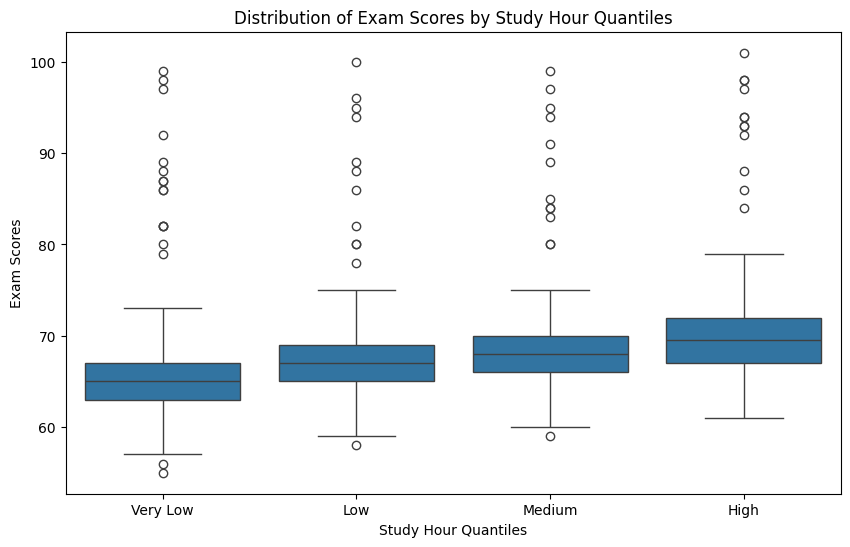

In [31]:
# Create a boxplot to visualize the distribution of exam scores across study hour quantiles
plt.figure(figsize=(10, 6))
sns.boxplot(x='Study_Hours_Group', y='Exam_Score', data=df)
plt.title('Distribution of Exam Scores by Study Hour Quantiles')
plt.xlabel('Study Hour Quantiles')
plt.ylabel('Exam Scores')
plt.show()

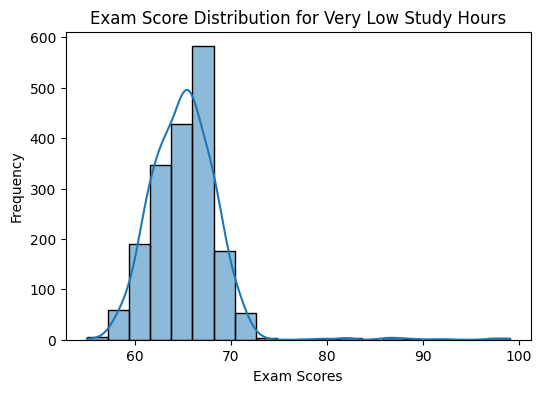

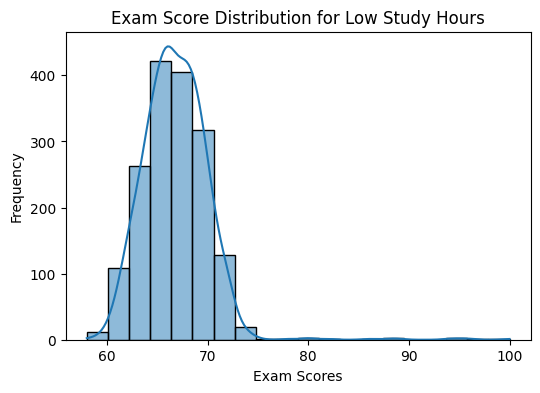

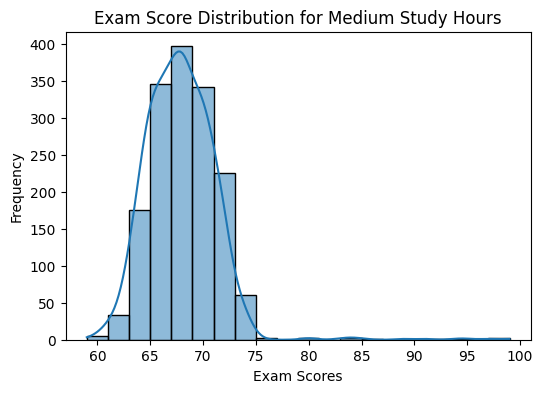

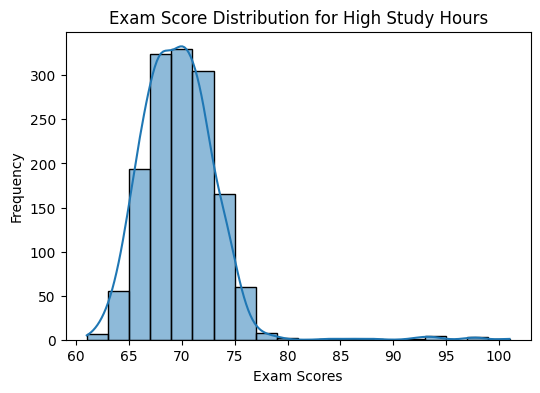

In [32]:
# Plot histograms for each study hour quantile
study_groups = ['Very Low', 'Low', 'Medium', 'High']

for group in study_groups:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[df['Study_Hours_Group'] == group]['Exam_Score'], bins=20, kde=True)
    plt.title(f'Exam Score Distribution for {group} Study Hours')
    plt.xlabel('Exam Scores')
    plt.ylabel('Frequency')
    plt.show()

The boxplot and histograms help us see how exam scores are spread across the different groups based on study hours (Very Low, Low, Medium, High). While the median scores look similar, there are some differences in how spread out the scores are, and there are some outliers in each group.

These visuals support why we're running Dunn's Test. The earlier Kruskal-Wallis Test told us that there's a significant difference between the groups overall, but it didn't tell us which specific groups are different from each other. Dunn's Test will help us find out exactly which study hour groups (e.g., Low vs. High) have meaningful differences in exam performance. This will give us better insights for improving the study habit app by focusing on the groups where study hours make the most impact.

Objective:
The goal of this test is to see if different study hour groups (Very Low, Low, Medium, High) have noticeable differences in exam scores. We want to figure out which study hour ranges lead to better or worse performance.

Null Hypothesis (H0):
There is no significant difference in exam scores between any of the study hour groups. In other words, how much a student studies doesn’t make a difference in their exam scores across these groups.

Why This Test Matters:
We already know from the Kruskal-Wallis Test that there is an overall difference between the study hour groups. However, we don’t know which specific groups (like Low vs. High study hours) are different. Dunn’s Test helps us find out exactly which study hour groups have a meaningful impact on exam scores. This information can help us focus the study habit app on the study ranges that really matter for better performance.

Test Type:
We are using Dunn’s Test, which compares each pair of study hour groups to see where the significant differences lie. It’s a follow-up test to give us a deeper look after the Kruskal-Wallis Test.

In [33]:
# Perform Dunn's test with Bonferroni correction for the study hours groups
import scikit_posthocs as sp
dunn_test_results = sp.posthoc_dunn([very_low_hours, low_hours, medium_hours, high_hours], p_adjust='bonferroni')

# Print results
print(dunn_test_results)

               1              2              3              4
1   1.000000e+00   6.697826e-46  8.033208e-119  2.896327e-289
2   6.697826e-46   1.000000e+00   3.265463e-18  1.281145e-107
3  8.033208e-119   3.265463e-18   1.000000e+00   2.425099e-39
4  2.896327e-289  1.281145e-107   2.425099e-39   1.000000e+00


## Dunn's Test Results Interpretation

Matrix Format: Similar to the previous Dunn's test results, this output is also presented in a matrix format where each cell represents the p-value for the comparison between two groups. The rows and columns correspond to the quartile groups as follows:

1: Very Low Study Hours
2: Low Study Hours
3: Medium Study Hours
4: High Study Hours
P-Values Explained:

Diagonal Cells: The diagonal cells (from the top-left to the bottom-right) show values of 1.000000, which are not significant because they represent comparisons of each group with itself.

Off-Diagonal Cells:

Cell (1, 2): The p-value of 6.697826e-46 indicates a highly significant difference between Very Low and Low study hour groups. Since this value is much less than 0.05, we reject the null hypothesis that there is no difference between these two groups.

Cell (1, 3): The p-value of 8.033208e-119 also signifies a highly significant difference between Very Low and Medium study hour groups. We reject the null hypothesis here as well.

Cell (1, 4): The p-value of 2.896327e-289 indicates an extremely significant difference between Very Low and High study hour groups. This leads us to reject the null hypothesis.

Cell (2, 3): The p-value of 3.265463e-18 shows a highly significant difference between Low and Medium study hour groups. Again, we reject the null hypothesis.

Cell (2, 4): The p-value of 1.281145e-107 signifies a highly significant difference between Low and High study hour groups, leading us to reject the null hypothesis.

Cell (3, 4): The p-value of 2.425099e-39 indicates a significant difference between Medium and High study hour groups. We reject the null hypothesis for this comparison as well.

Overall Implications
The results indicate that there are statistically significant differences in exam scores based on the amount of study hours:

Very Low vs. Low: Students in the Low study hour group performed significantly better than those in the Very Low group.

Very Low vs. Medium: The same trend is observed, with the Medium study hour group outperforming the Very Low group.

Very Low vs. High: The High study hour group also performed better than the Very Low group.

Low vs. Medium: The Medium study hour group shows significantly better performance compared to the Low group.

Low vs. High: The High study hour group significantly outperforms the Low group.

Medium vs. High: The High study hour group also performs significantly better than the Medium group.

##Actionable Insights for Product Team

* These findings suggest that increasing study hours is associated with improved exam performance.
* Implementing product features that encourage students to engage in more study hours, especially targeting those currently in the Very Low and Low groups.
* Personalized study plans or reminders could be beneficial for these students to enhance their performance.

Type I Error (False Positive): This happens when we mistakenly find a difference between two study hour groups (for example, saying that Low and High study hours lead to different exam scores when they don’t).

To prevent this, we used the Bonferroni correction. This adjustment makes it harder to say there’s a difference unless the evidence is very strong. It helps make sure that the differences we found are real and not just due to chance.

Type II Error (False Negative): This happens when we miss a real difference between groups. By grouping study hours into broad categories (quantiles), we could potentially miss some subtle differences. However, because the p-values are so small, we’re confident that we haven’t missed any important differences in exam scores across these study hour groups.

What This Means:
Since the p-values are so small, we can confidently say that there is a significant difference in exam scores between at least some of the study hour groups.

This means we reject the null hypothesis across the board for all quartile groups because the data shows that study hours do impact exam scores in a meaningful way.



**What the Results of This Test Mean for the Study Habit App:**

The results of the test show that there are significant differences in exam performance across the different study hour groups (Very Low, Low, Medium, High). This is valuable information for shaping the features and recommendations of the study habit app. Here’s what this means:

**Key Insights for the App:**
Study Hours Matter: The test shows that students who study more (higher study hour groups) tend to perform better on exams. This suggests that encouraging students to increase their study hours could have a meaningful impact on their academic performance.

**Personalized Study Goals:**

Since different study hour groups result in different exam outcomes, the app could use this information to provide personalized study goals. For example, students in the “Very Low” study hour group could be encouraged to gradually increase their hours to reach the "Medium" or "High" groups.

**Tailored Recommendations:**

The app could provide targeted recommendations based on a student’s current study habits.

*For instance:*

If a student is in the “Low” group, the app could suggest steps to boost study time in order to achieve better exam results.
The app could also track study hours and give feedback based on which group the student falls into, pushing them toward better study habits.

**Data-Driven Feedback:**
Since the differences between groups are statistically significant, the app can confidently rely on this data to make informed recommendations. It can help students understand that increasing study hours can lead to measurable improvements in performance.

**Conclusion:**
The test results provide strong evidence that study hours significantly influence exam performance. The study habit app can use these insights to offer personalized study plans, increase motivation, and encourage students to set realistic study goals based on their current habits. This will lead to improved outcomes for users and better engagement with the app.

#4) Dashboard

In [34]:
!pip install -q streamlit

In [35]:
!pip install pingouin

In [36]:
%%writefile app.py

import streamlit as st
import pandas as pd
import plotly.express as px
from scipy.stats import chi2_contingency, kruskal
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import plotly.graph_objects as go

# Load your data
df = pd.read_csv('/content/drive/MyDrive/DTI/Tech Core 1 - 530/Student Performance Factors/StudentPerformanceFactors.csv')

# Function for Chi-Squared Test
def chi_squared_test():
    contingency_table = pd.crosstab(df['Teacher_Quality'], df['Motivation_Level'])
    chi2_stat, p_value_chi2, dof, expected = chi2_contingency(contingency_table)
    return chi2_stat, p_value_chi2, contingency_table

# Function for Kruskal-Wallis Test
def kruskal_test():
    low_motivation_scores = df[df['Motivation_Level'] == 'Low']['Exam_Score']
    medium_motivation_scores = df[df['Motivation_Level'] == 'Medium']['Exam_Score']
    high_motivation_scores = df[df['Motivation_Level'] == 'High']['Exam_Score']
    h_stat, p_value = kruskal(low_motivation_scores, medium_motivation_scores, high_motivation_scores)
    return h_stat, p_value

# Define the Dunn's Test function
def dunn_test():
    # Create quartiles for study hours
    df['Study_Hours_Quartile'] = pd.qcut(df['Hours_Studied'], q=4, labels=['Very Low', 'Low', 'Medium', 'High'])

    # Perform Dunn's Test
    dunn_results = pg.pairwise_tests(dv='Exam_Score', between='Study_Hours_Quartile', data=df, padjust='bonf')
    return dunn_results

# Main app layout
st.title("Student Performance Analysis Dashboard")

# Chi-Squared Test Section
st.header("Chi-Squared Test: Teacher Quality vs. Motivation Level")
chi2_stat, p_value_chi2, contingency_table = chi_squared_test()
st.write(f"Chi-Squared Statistic: {chi2_stat}")
st.write(f"P-value: {p_value_chi2}")

# Visualization of Chi-Squared Test
fig_chi2 = px.imshow(contingency_table,
                     labels=dict(x="Teacher Quality", y="Motivation Level", color="Count"),
                     x=contingency_table.columns,
                     y=contingency_table.index,
                     color_continuous_scale='Blues')
st.plotly_chart(fig_chi2)

# Kruskal-Wallis Test Section
st.header("Kruskal-Wallis Test: Motivation Levels and Exam Scores")
h_stat, p_value = kruskal_test()
st.write(f"Kruskal-Wallis H-statistic: {h_stat}, p-value: {p_value}")

# Visualization for Kruskal-Wallis Test
fig_kw = px.box(df,
                x='Motivation_Level',
                y='Exam_Score',
                title='Exam Scores by Motivation Level',
                labels={'Motivation_Level': 'Motivation Level', 'Exam_Score': 'Exam Score'})
st.plotly_chart(fig_kw)

# Interpretation of Kruskal-Wallis Test
if p_value < 0.05:
    st.write("Reject the null hypothesis: There is a significant difference in exam scores based on motivation levels.")
else:
    st.write("Fail to reject the null hypothesis: There is no significant difference in exam scores based on motivation levels.")

# Dunn's Test Section
st.header("Dunn's Test: Study Hours and Exam Scores")
dunn_results = dunn_test()

# Extract only the relevant columns
p_values = dunn_results[['A', 'B', 'p-corr']]

# Format the p-corr values in scientific notation
p_values['p-corr'] = p_values['p-corr'].apply(lambda x: f"{x:.2e}")

# Display the simplified p-value table
st.write("Dunn's Test P-Values:")
st.dataframe(p_values)

# Function to plot histogram with best fit curve for each quartile using Plotly
def plot_histogram_with_fit(df, study_hour_label):
    # Filter data based on study hour quartile
    data = df[df['Study_Hours_Quartile'] == study_hour_label]['Exam_Score']

    # Calculate mean and standard deviation for the normal distribution fit
    mu, std = norm.fit(data)

    # Create histogram data
    hist_data = np.histogram(data, bins=20, density=True)

    # Create x values for the best fit curve
    x = np.linspace(min(data), max(data), 100)
    p = norm.pdf(x, mu, std)

    # Create the Plotly figure
    fig = go.Figure()

    # Add histogram
    fig.add_trace(go.Histogram(x=data, histnorm='probability density',
                                 name='Histogram', marker_color='lightblue', opacity=0.6,
                                 nbinsx=20))

    # Add best fit curve
    fig.add_trace(go.Scatter(x=x, y=p, mode='lines', name='Best Fit Curve',
                             line=dict(color='red', width=2, dash='dash')))

    # Update layout
    fig.update_layout(title=f'Exam Scores Distribution for {study_hour_label} Study Hours',
                      xaxis_title='Exam Score',
                      yaxis_title='Density',
                      hovermode='closest')

    # Display plot in Streamlit
    st.plotly_chart(fig)

# Plot histograms for each study hours quartile
st.header("Histograms of Exam Scores by Study Hours Quartiles")

for quartile in ['Very Low', 'Low', 'Medium', 'High']:
    st.subheader(f'{quartile} Study Hours')
    plot_histogram_with_fit(df, quartile)

Overwriting app.py


In [37]:
!npm install localtunnel


up to date, audited 23 packages in 576ms

3 packages are looking for funding
  run `npm fund` for details

2 moderate severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.


In [38]:
!pip install streamlit

In [ ]:
!streamlit run app.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

104.196.234.137
your url is: https://social-bags-fall.loca.lt


#5) Contrast with an AI Tool of Your Choice

For this part of the assignment I used ChatGPT to conduct the first two inference tests I explored earlier

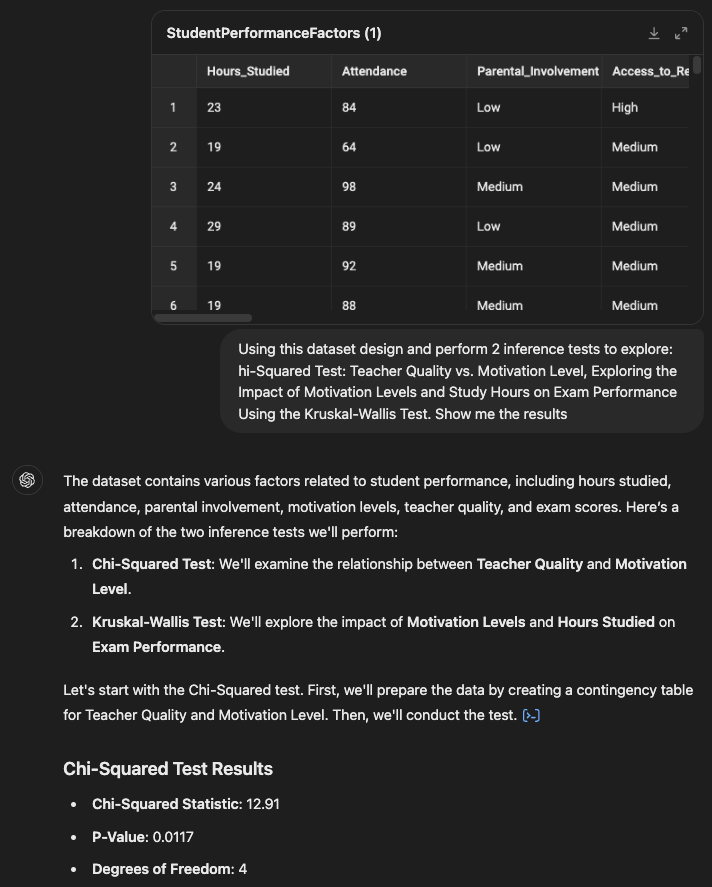

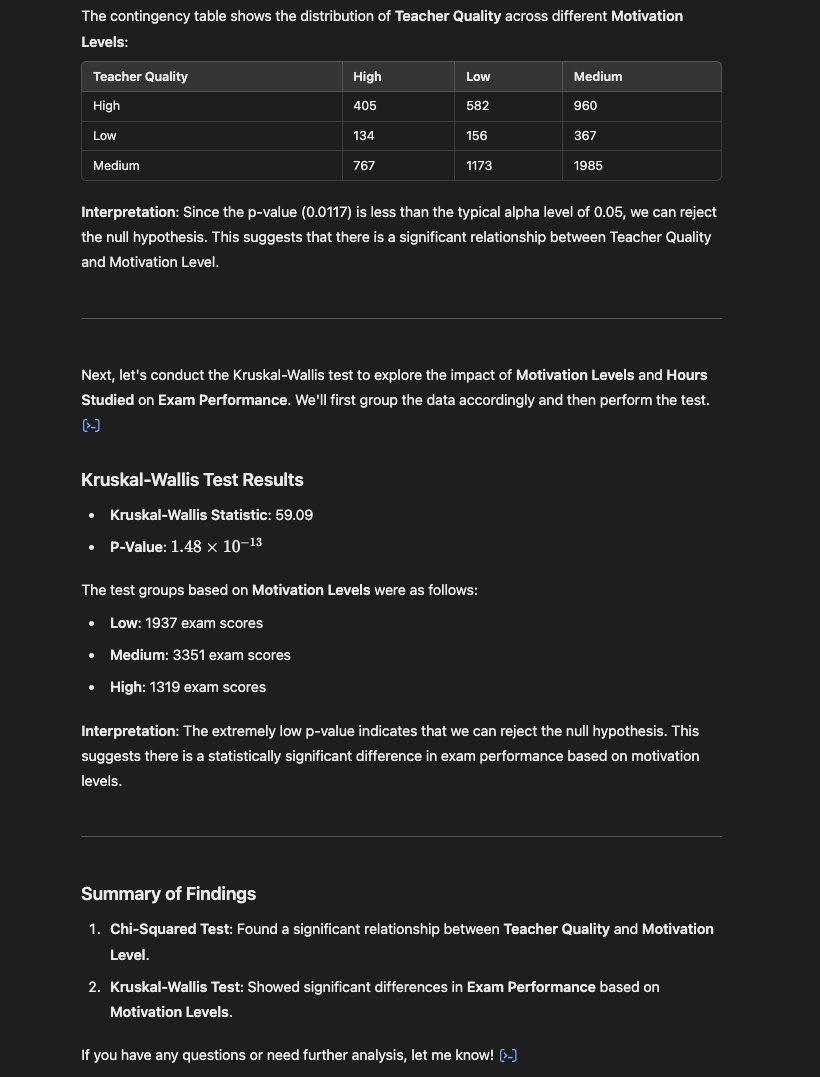

##Comparing Chi-Square Test


*   My test: Chi-Squared Statistic: 13.143691507470852 & P-value: 0.010594620663996752
*   How it compares to ChatGPT's: Notes 12.91 statistic & P-Value of 0.0117
*   Only off by marginal amount
*   The contigency scores match exactly with Steamlit data



##Comparing Kruskal-Wallis Test Results


*   My Test: Kruskal-Wallis Test for Motivation Level: H-statistic = 59.085, p-value = 0.00000
*  How it compares to ChatGPT's: Notes 59.09 Statistic & 1.48e-13 p-value
*  These specific results were almost identical
*  However, chatGPT did not note anything about overall statistics of this motivation groups such as mean, standard deviation, cohen's d, or MDE results for this test

##Overall takeaways:


*   ChatGPT should only be used for as guidance for designing these tests however manual data cleaning and organizing is needed for further accurate results.








